<a href="https://colab.research.google.com/github/cmukonomuwi/DataScience/blob/main/Sentiment_Analysis_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6>Sentiment Analysis - Hands-on</font></center>

# **Problem Statement**

In the fast-evolving landscape of the entertainment industry, it is important to gauge audience sentiments towards movie releases. Understanding the sentiments expressed in movie reviews is crucial for shaping marketing strategies, refining content creation, and ultimately enhancing the overall viewer experience. However, manually analyzing an extensive volume of reviews is time-consuming and may not capture nuanced sentiments at scale. To address this, we aim to develop an ML-based sentiment analyzer that automatically evaluates movie reviews, providing actionable insights into audience perceptions.

# **Data Dictionary**

- **review**: review of a movie
- **sentiment**: indicates the sentiment of the review ( 0 is for negative review and 1 for positive review)

# **Installing and Importing Necessary Libraries**

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to manipulate string data
import string

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading data into a pandas dataframe
# Update the path to reflect the location in your Google Drive
reviews = pd.read_csv("/content/drive/MyDrive/movie_reviews.csv")

In [ ]:
# creating a copy of the data
data = reviews.copy()

# **Data Overview**

## **Checking the first 5 rows**

In [ ]:
data.head(5)

,review,sentiment
0,"Okay, I know this does'nt project India in a good light. But the overall theme of the movie is not India, it's Shakti. The power of a warlord, and the power of a mother. The relationship between Nandini and her husband and son swallow you up in their warmth. Then things go terribly wrong. The interaction between Nandini and her father in law - the power of their dysfunctional relationship - and the lives changed by it are the strengths of this movie. Shah Rukh Khan's performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor. It is easy to get caught up in the love, violence and redemption of lives in this film, and find yourself heaving a sigh of relief and sadness at the climax. The musical interludes are strengths, believable and well done.",1
1,"Despite John Travolta's statements in interviews that this was his favorite role of his career, ""Be Cool"" proves to be a disappointing sequel to 1995's witty and clever ""Get Shorty.""<br /><br />Travolta delivers a pleasant enough performance in this mildly entertaining film, but ultimately the movie falls flat due to an underdeveloped plot, unlikeable characters, and a surprising lack of chemistry between leads Travolta and Uma Thurman. Although there are some laughs, this unfunny dialog example (which appeared frequently in the trailers) kind of says it all: Thurman: Do you dance? Travolta: Hey, I'm from Brooklyn.<br /><br />The film suggests that everyone in the entertainment business is a gangster or aspires to be one, likening it to organized crime. In ""Get Shorty,"" the premise of a gangster ""going legitimate"" by getting into movies was a clever fish-out-of water idea, but in ""Be Cool,"" it seems the biz has entirely gone crooked since then.<br /><br />The film is interestingly casted and the absolute highlight is a ""monolgue"" delivered by The Rock, whose character is an aspiring actor as well as a goon, where he reenacts a scene between Gabrielle Union and Kirsten Dunst from ""Bring It On."" Vince Vaughan's character thinks he's black and he's often seen dressed as a pimp-- this was quite funny in the first scene that introduces him and gets tired and embarrassing almost immediately afterward.<br /><br />Overall, ""Be Cool"" may be worth a rental for John Travolta die-hards (of which I am one), but you may want to keep your finger close to the fast forward button to get through it without feeling that you wasted too much time. Fans of ""Get Shorty"" may actually wish to avoid this, as the sequel is devoid of most things that made that one a winner. I rate this movie an admittedly harsh 4/10.",0
2,"I am a kung fu fan, but not a Woo fan. I have no interest in gangster movies filled with over-the-top gun-play. Now, martial arts; *that's* beautiful! And John Woo surprised me here by producing a highly entertaining kung fu movie, which almost has *too much* fighting, if such a thing is possible! This is good stuff.<br /><br />Many of the fight scenes are very good (and some of them are less good), and the main characters are amusing and likable. The bad guys are a bit too unbelievably evil, but entertaining none the less. You gotta see the Sleeping Wizard!! He can only fight when he's asleep - it's hysterical!<br /><br />Upon repeated viewings, however, Last Hurrah For Chivalry can tend to get a little boring and long-winded, also especially because many of the fight scenes are actually not that good. Hence, I rate it ""only"" a 7 out of 10. But it really is almost an ""8"".<br /><br />All in all one of the better kung fu movies, made smack-dab in the heart of kung fu cinema's prime. All the really good kung fu movies are from the mid- to late 1970ies, with some notable exceptions from the late '60ies and early '70ies (and early '80ies, to be fair).",1
3,"He seems to be a control freak. I have heard him comment on ""losing control of the show"" and tell another guest who brought live animals that he had one rule-""n

* Here, a sentiment value of **0 is negative** and **1 is positive**.

## **Checking the shape of the data**

In [ ]:
data.shape

(10000, 2)

* The dataset has 10000 rows and 2 columns.

## **Checking for missing values**

In [ ]:
data.isnull().sum()

,0
review,0
sentiment,0


* There are no missing values in the data

## **Checking for duplicate values**

In [ ]:
# checking for duplicate values
data.duplicated().sum()

np.int64(18)

In [ ]:
# keeping only the first occurence of duplicate values and dropping the rest
data = data.drop_duplicates(keep = 'first')

In [ ]:
# reseting the index of the dataframe
data = data.reset_index(drop = True)

* The duplicate values have been removed.

## **Checking the distribution of sentiments**

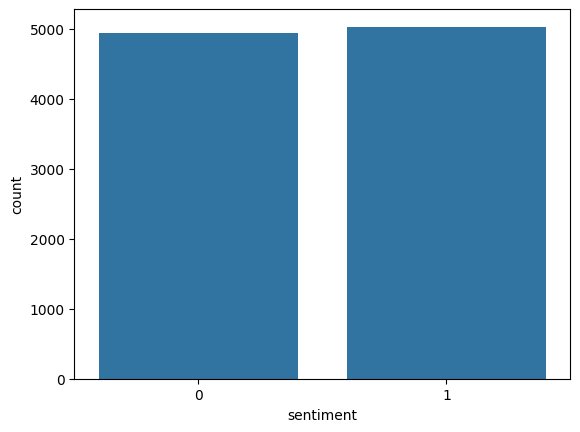

In [ ]:
sns.countplot(data=data, x='sentiment');

- There are an equal number of positive and negative reviews.

# **Text Preprocessing**

### **Removing special characters from the text**

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['review'].apply(remove_special_characters)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['review','cleaned_text']]

,review,cleaned_text
0,"Okay, I know this does'nt project India in a good light. But the overall theme of the movie is not India, it's Shakti. The power of a warlord, and the power of a mother. The relationship between Nandini and her husband and son swallow you up in their warmth. Then things go terribly wrong. The interaction between Nandini and her father in law - the power of their dysfunctional relationship - and the lives changed by it are the strengths of this movie. Shah Rukh Khan's performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor. It is easy to get caught up in the love, violence and redemption of lives in this film, and find yourself heaving a sigh of relief and sadness at the climax. The musical interludes are strengths, believable and well done.",Okay I know this does nt project India in a good light But the overall theme of the movie is not India it s Shakti The power of a warlord and the power of a mother The relationship between Nandini and her husband and son swallow you up in their warmth Then things go terribly wrong The interaction between Nandini and her father in law the power of their dysfunctional relationship and the lives changed by it are the strengths of this movie Shah Rukh Khan s performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor It is easy to get caught up in the love violence and redemption of lives in this film and find yourself heaving a sigh of relief and sadness at the climax The musical interludes are strengths believable and well done
1,"Despite John Travolta's statements in interviews that this was his favorite role of his career, ""Be Cool"" proves to be a disappointing sequel to 1995's witty and clever ""Get Shorty.""<br /><br />Travolta delivers a pleasant enough performance in this mildly entertaining film, but ultimately the movie falls flat due to an underdeveloped plot, unlikeable characters, and a surprising lack of chemistry between leads Travolta and Uma Thurman. Although there are some laughs, this unfunny dialog example (which appeared frequently in the trailers) kind of says it all: Thurman: Do you dance? Travolta: Hey, I'm from Brooklyn.<br /><br />The film suggests that everyone in the entertainment business is a gangster or aspires to be one, likening it to organized crime. In ""Get Shorty,"" the premise of a gangster ""going legitimate"" by getting into movies was a clever fish-out-of water idea, but in ""Be Cool,"" it seems the biz has entirely gone crooked since then.<br /><br />The film is interestingly casted and the absolute highlight is a ""monolgue"" delivered by The Rock, whose character is an aspiring actor as well as a goon, where he reenacts a scene between Gabrielle Union and Kirsten Dunst from ""Bring It On."" Vince Vaughan's character thinks he's black and he's often seen dressed as a pimp-- this was quite funny in the first scene that introduces him and gets tired and embarrassing almost immediately afterward.<br /><br />Overall, ""Be Cool"" may be worth a rental for John Travolta die-hards (of which I am one), but you may want to keep your finger close to the fast forward button to get through it without feeling that you wasted too much time. Fans of ""Get Shorty"" may actually wish to avoid this, as the sequel is devoid of most things that made that one a winner. I rate this movie an admittedly harsh 4/10.",Despite John Travolta s statements in interviews that this was his favorite role of his career Be Cool proves to be a disappointing sequel to 1995 s witty and clever Get Shorty br br Travolta delivers a pleasant enough performance in this mildly entertaining film but ultimately the movie falls flat due to an underdeveloped plot unlikeable characters and a surprising lack of chemistry between leads Travolta and Uma Thurman Although there are some laughs this unfunny dialog example which appeared frequently in the trailers kind of says it all Thurman Do you dance Travo

- We can observe that regex simply removed the special characters and retained the alphabets and numbers.

### **Lowercasing**

In [ ]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['review','cleaned_text']]

,review,cleaned_text
0,"Okay, I know this does'nt project India in a good light. But the overall theme of the movie is not India, it's Shakti. The power of a warlord, and the power of a mother. The relationship between Nandini and her husband and son swallow you up in their warmth. Then things go terribly wrong. The interaction between Nandini and her father in law - the power of their dysfunctional relationship - and the lives changed by it are the strengths of this movie. Shah Rukh Khan's performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor. It is easy to get caught up in the love, violence and redemption of lives in this film, and find yourself heaving a sigh of relief and sadness at the climax. The musical interludes are strengths, believable and well done.",okay i know this does nt project india in a good light but the overall theme of the movie is not india it s shakti the power of a warlord and the power of a mother the relationship between nandini and her husband and son swallow you up in their warmth then things go terribly wrong the interaction between nandini and her father in law the power of their dysfunctional relationship and the lives changed by it are the strengths of this movie shah rukh khan s performance seems to be a mere cameo compared to the believable desperation of karisma kapoor it is easy to get caught up in the love violence and redemption of lives in this film and find yourself heaving a sigh of relief and sadness at the climax the musical interludes are strengths believable and well done
1,"Despite John Travolta's statements in interviews that this was his favorite role of his career, ""Be Cool"" proves to be a disappointing sequel to 1995's witty and clever ""Get Shorty.""<br /><br />Travolta delivers a pleasant enough performance in this mildly entertaining film, but ultimately the movie falls flat due to an underdeveloped plot, unlikeable characters, and a surprising lack of chemistry between leads Travolta and Uma Thurman. Although there are some laughs, this unfunny dialog example (which appeared frequently in the trailers) kind of says it all: Thurman: Do you dance? Travolta: Hey, I'm from Brooklyn.<br /><br />The film suggests that everyone in the entertainment business is a gangster or aspires to be one, likening it to organized crime. In ""Get Shorty,"" the premise of a gangster ""going legitimate"" by getting into movies was a clever fish-out-of water idea, but in ""Be Cool,"" it seems the biz has entirely gone crooked since then.<br /><br />The film is interestingly casted and the absolute highlight is a ""monolgue"" delivered by The Rock, whose character is an aspiring actor as well as a goon, where he reenacts a scene between Gabrielle Union and Kirsten Dunst from ""Bring It On."" Vince Vaughan's character thinks he's black and he's often seen dressed as a pimp-- this was quite funny in the first scene that introduces him and gets tired and embarrassing almost immediately afterward.<br /><br />Overall, ""Be Cool"" may be worth a rental for John Travolta die-hards (of which I am one), but you may want to keep your finger close to the fast forward button to get through it without feeling that you wasted too much time. Fans of ""Get Shorty"" may actually wish to avoid this, as the sequel is devoid of most things that made that one a winner. I rate this movie an admittedly harsh 4/10.",despite john travolta s statements in interviews that this was his favorite role of his career be cool proves to be a disappointing sequel to 1995 s witty and clever get shorty br br travolta delivers a pleasant enough performance in this mildly entertaining film but ultimately the movie falls flat due to an underdeveloped plot unlikeable characters and a surprising lack of chemistry between leads travolta and uma thurman although there are some laughs this unfunny dialog example which appeared frequently in the trailers kind of says it all thurman do you dance travo

- We can observe that all the text has now successfully been converted to lower case.

### **Removing extra whitespace**

In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['review','cleaned_text']]

,review,cleaned_text
0,"Okay, I know this does'nt project India in a good light. But the overall theme of the movie is not India, it's Shakti. The power of a warlord, and the power of a mother. The relationship between Nandini and her husband and son swallow you up in their warmth. Then things go terribly wrong. The interaction between Nandini and her father in law - the power of their dysfunctional relationship - and the lives changed by it are the strengths of this movie. Shah Rukh Khan's performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor. It is easy to get caught up in the love, violence and redemption of lives in this film, and find yourself heaving a sigh of relief and sadness at the climax. The musical interludes are strengths, believable and well done.",okay i know this does nt project india in a good light but the overall theme of the movie is not india it s shakti the power of a warlord and the power of a mother the relationship between nandini and her husband and son swallow you up in their warmth then things go terribly wrong the interaction between nandini and her father in law the power of their dysfunctional relationship and the lives changed by it are the strengths of this movie shah rukh khan s performance seems to be a mere cameo compared to the believable desperation of karisma kapoor it is easy to get caught up in the love violence and redemption of lives in this film and find yourself heaving a sigh of relief and sadness at the climax the musical interludes are strengths believable and well done
1,"Despite John Travolta's statements in interviews that this was his favorite role of his career, ""Be Cool"" proves to be a disappointing sequel to 1995's witty and clever ""Get Shorty.""<br /><br />Travolta delivers a pleasant enough performance in this mildly entertaining film, but ultimately the movie falls flat due to an underdeveloped plot, unlikeable characters, and a surprising lack of chemistry between leads Travolta and Uma Thurman. Although there are some laughs, this unfunny dialog example (which appeared frequently in the trailers) kind of says it all: Thurman: Do you dance? Travolta: Hey, I'm from Brooklyn.<br /><br />The film suggests that everyone in the entertainment business is a gangster or aspires to be one, likening it to organized crime. In ""Get Shorty,"" the premise of a gangster ""going legitimate"" by getting into movies was a clever fish-out-of water idea, but in ""Be Cool,"" it seems the biz has entirely gone crooked since then.<br /><br />The film is interestingly casted and the absolute highlight is a ""monolgue"" delivered by The Rock, whose character is an aspiring actor as well as a goon, where he reenacts a scene between Gabrielle Union and Kirsten Dunst from ""Bring It On."" Vince Vaughan's character thinks he's black and he's often seen dressed as a pimp-- this was quite funny in the first scene that introduces him and gets tired and embarrassing almost immediately afterward.<br /><br />Overall, ""Be Cool"" may be worth a rental for John Travolta die-hards (of which I am one), but you may want to keep your finger close to the fast forward button to get through it without feeling that you wasted too much time. Fans of ""Get Shorty"" may actually wish to avoid this, as the sequel is devoid of most things that made that one a winner. I rate this movie an admittedly harsh 4/10.",despite john travolta s statements in interviews that this was his favorite role of his career be cool proves to be a disappointing sequel to 1995 s witty and clever get shorty br br travolta delivers a pleasant enough performance in this mildly entertaining film but ultimately the movie falls flat due to an underdeveloped plot unlikeable characters and a surprising lack of chemistry between leads travolta and uma thurman although there are some laughs this unfunny dialog example which appeared frequently in the trailers kind of says it all thurman do you dance travo

* The above code will remove the white spaces in the text

### **Removing stopwords**

* The idea with stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus.
* Pronouns and articles are typically categorized as stop words.
* The `NLTK` library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.

In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,okay i know this does nt project india in a good light but the overall theme of the movie is not india it s shakti the power of a warlord and the power of a mother the relationship between nandini and her husband and son swallow you up in their warmth then things go terribly wrong the interaction between nandini and her father in law the power of their dysfunctional relationship and the lives changed by it are the strengths of this movie shah rukh khan s performance seems to be a mere cameo compared to the believable desperation of karisma kapoor it is easy to get caught up in the love violence and redemption of lives in this film and find yourself heaving a sigh of relief and sadness at the climax the musical interludes are strengths believable and well done,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth things go terribly wrong interaction nandini father law power dysfunctional relationship lives changed strengths movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption lives film find heaving sigh relief sadness climax musical interludes strengths believable well done
1,despite john travolta s statements in interviews that this was his favorite role of his career be cool proves to be a disappointing sequel to 1995 s witty and clever get shorty br br travolta delivers a pleasant enough performance in this mildly entertaining film but ultimately the movie falls flat due to an underdeveloped plot unlikeable characters and a surprising lack of chemistry between leads travolta and uma thurman although there are some laughs this unfunny dialog example which appeared frequently in the trailers kind of says it all thurman do you dance travolta hey i m from brooklyn br br the film suggests that everyone in the entertainment business is a gangster or aspires to be one likening it to organized crime in get shorty the premise of a gangster going legitimate by getting into movies was a clever fish out of water idea but in be cool it seems the biz has entirely gone crooked since then br br the film is interestingly casted and the absolute highlight is a monolgue delivered by the rock whose character is an aspiring actor as well as a goon where he reenacts a scene between gabrielle union and kirsten dunst from bring it on vince vaughan s character thinks he s black and he s often seen dressed as a pimp this was quite funny in the first scene that introduces him and gets tired and embarrassing almost immediately afterward br br overall be cool may be worth a rental for john travolta die hards of which i am one but you may want to keep your finger close to the fast forward button to get through it without feeling that you wasted too much time fans of get shorty may actually wish to avoid this as the sequel is devoid of most things that made that one a winner i rate this movie an admittedly harsh 4 10,despite john travolta statements interviews favorite role career cool proves disappointing sequel 1995 witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie falls flat due underdeveloped plot unlikeable characters surprising lack chemistry leads travolta uma thurman although laughs unfunny dialog example appeared frequently trailers kind says thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movies clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character thinks black often seen dressed pimp quite funny first scene introduces get

### **Stemming**

Stemming is a language processing method that chops off word endings to find the root or base form of words.

For example,

- Original Word: Jumping, Stemmed Word: Jump
- Original Word: Running, Stemmed Word: Run

The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [ ]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,okay know nt project india good light overall theme movie india shakti power warlord power mother relationship nandini husband son swallow warmth things go terribly wrong interaction nandini father law power dysfunctional relationship lives changed strengths movie shah rukh khan performance seems mere cameo compared believable desperation karisma kapoor easy get caught love violence redemption lives film find heaving sigh relief sadness climax musical interludes strengths believable well done,okay know nt project india good light overal theme movi india shakti power warlord power mother relationship nandini husband son swallow warmth thing go terribl wrong interact nandini father law power dysfunct relationship live chang strength movi shah rukh khan perform seem mere cameo compar believ desper karisma kapoor easi get caught love violenc redempt live film find heav sigh relief sad climax music interlud strength believ well done
1,despite john travolta statements interviews favorite role career cool proves disappointing sequel 1995 witty clever get shorty br br travolta delivers pleasant enough performance mildly entertaining film ultimately movie falls flat due underdeveloped plot unlikeable characters surprising lack chemistry leads travolta uma thurman although laughs unfunny dialog example appeared frequently trailers kind says thurman dance travolta hey brooklyn br br film suggests everyone entertainment business gangster aspires one likening organized crime get shorty premise gangster going legitimate getting movies clever fish water idea cool seems biz entirely gone crooked since br br film interestingly casted absolute highlight monolgue delivered rock whose character aspiring actor well goon reenacts scene gabrielle union kirsten dunst bring vince vaughan character thinks black often seen dressed pimp quite funny first scene introduces gets tired embarrassing almost immediately afterward br br overall cool may worth rental john travolta die hards one may want keep finger close fast forward button get without feeling wasted much time fans get shorty may actually wish avoid sequel devoid things made one winner rate movie admittedly harsh 4 10,despit john travolta statement interview favorit role career cool prove disappoint sequel 1995 witti clever get shorti br br travolta deliv pleasant enough perform mildli entertain film ultim movi fall flat due underdevelop plot unlik charact surpris lack chemistri lead travolta uma thurman although laugh unfunni dialog exampl appear frequent trailer kind say thurman danc travolta hey brooklyn br br film suggest everyon entertain busi gangster aspir one liken organ crime get shorti premis gangster go legitim get movi clever fish water idea cool seem biz entir gone crook sinc br br film interestingli cast absolut highlight monolgu deliv rock whose charact aspir actor well goon reenact scene gabriel union kirsten dunst bring vinc vaughan charact think black often seen dress pimp quit funni first scene introduc get tire embarrass almost immedi afterward br br overal cool may worth rental john travolta die hard one may want keep finger close fast forward button get without feel wast much time fan get shorti may actual wish avoid sequel devoid thing made one winner rate movi admittedli harsh 4 10
2,kung fu fan woo fan interest gangster movies filled top gun play martial arts beautiful john woo surprised producing highly entertaining kung fu movie almost much fighting thing possible good stuff br br many fight scenes good less good main characters amusing likable bad guys bit unbelievably evil entertaining none less gotta see sleeping wizard fight asleep hysterical br br upon repeated viewings however last hurrah chivalry tend get little boring long winded also especially many fight scenes actually good hence rate 7 10 really almost 8 br br one better kung fu movies made smack dab heart kung fu cinema prime really good kung fu movies mi

# **Text Vectorization**

- We'll use the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class of sklearn to vectorize the data using Bag of Words (BoW).

- We first create the document-term matrix, where each value in the matrix stores the count of a term in a document.

- We then consider only the top *n* terms by frequency
    - *n* is a hyperparameter that one can change and experiment with

In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(9982, 1000)

In [ ]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [ ]:
# Checking the words considered by BoW model
words

array(['10', '100', '20', '30', '50', '60', '70', '80', '90', 'abil',
       'abl', 'absolut', 'accent', 'accept', 'achiev', 'across', 'act',
       'action', 'actor', 'actress', 'actual', 'ad', 'adapt', 'add',
       'admit', 'adult', 'adventur', 'age', 'ago', 'agre', 'air', 'alien',
       'aliv', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also',
       'although', 'alway', 'amaz', 'america', 'american', 'among',
       'amount', 'amus', 'anim', 'ann', 'annoy', 'anoth', 'answer',
       'anti', 'anyon', 'anyth', 'anyway', 'apart', 'appar', 'appeal',
       'appear', 'appreci', 'approach', 'armi', 'around', 'arriv', 'art',
       'artist', 'ask', 'aspect', 'atmospher', 'attack', 'attempt',
       'attent', 'attract', 'audienc', 'averag', 'avoid', 'aw', 'award',
       'away', 'awesom', 'babi', 'back', 'background', 'bad', 'badli',
       'band', 'bare', 'base', 'basic', 'battl', 'beat', 'beauti',
       'becam', 'becom', 'begin', 'behind', 'believ', 'best', 'better',
       'beyo

In [ ]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

,10,100,20,30,50,60,70,80,90,abil,...,writer,written,wrong,wrote,ye,year,yet,york,young,zombi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0


- From the above dataframe, we can observe that the word *wrong* is present only once in the first document, and the word *young* is presented twice in the fifth document.

# **Machine Learning**

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['negative', 'positive']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

We'll be building a Random Forest model with the vectorized data.

In [ ]:
# Storing independent variable
X = df_BOW.copy()

# Storing target variable
y = data.sentiment

In [ ]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Building the model
rf_bow = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_bow.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [ ]:
# Predicting on train data
y_pred_train = rf_bow.predict(X_train)

# Predicting on test data
y_pred_test = rf_bow.predict(X_test)

**Confusion Matrix**

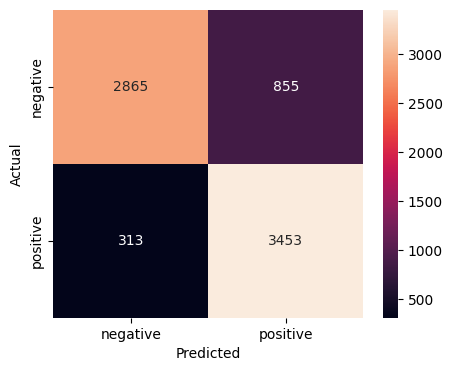

In [ ]:
plot_confusion_matrix(y_train, y_pred_train)

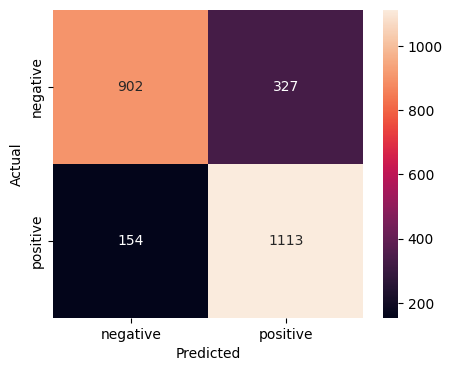

In [ ]:
plot_confusion_matrix(y_test, y_pred_test)

**Classification report**

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      3720
           1       0.80      0.92      0.86      3766

    accuracy                           0.84      7486
   macro avg       0.85      0.84      0.84      7486
weighted avg       0.85      0.84      0.84      7486



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1229
           1       0.77      0.88      0.82      1267

    accuracy                           0.81      2496
   macro avg       0.81      0.81      0.81      2496
weighted avg       0.81      0.81      0.81      2496



# **Conclusion**

- We used different text processing techniques to clean the raw text data.

- We then vectorized the cleaned text data using Bag of Words.

- We then built an ML model (Random Forest) with the vectorized data.

- The Random Forest model was able to achieve an accuracy of \~84% on the train set and \~81% on the test set.

___